In [15]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import control
import control.matlab
from sympy import *

### Questao 1

In [3]:
T = 0.5

Gs = tf([1,1], [1, 4])

Gz = c2d(Gs, T)

print('Gz = \n', Gz)

Gz = 
 
z - 0.7838
----------
z - 0.1353

dt = 0.5



In [10]:
GHs = tf([2,2],[1,4,0])

GHz = c2d(GHs, T)

print('Hz = \n', GHz)

Hz = 
 
  0.5742 z - 0.3581
----------------------
z^2 - 1.135 z + 0.1353

dt = 0.5



In [6]:
Fs = tf([5],[1, 0])

Fz = c2d(Fs, T)

print('Fz = \n', Fz)

Fz = 
 
 2.5
-----
z - 1

dt = 0.5



## Bloco das equacoes recursivas

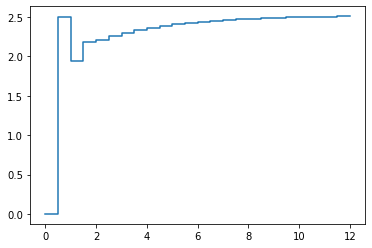

In [9]:
#Equacoes recursivas 

#G
#c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]

#GH
#v[k] = 0.5742*e[k-1] - 0.3581*e[k-2] + 1.135*v[k-1] - 0.1353*v[k-2]

#F
#x[k] =  2.5*r[k-1] + x[k-1]

#e = x - v

kmax = 25

# Para entrada degrau unitario: np.ones(kmax)
# Para entrada rampa unitario: T*arange(0,kmax) 
t = T*arange(0,kmax)
r = np.ones(kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
x = np.zeros(kmax)
e = np.zeros(kmax)

k = 1

v[k] = 0.5742*e[k-1] + 1.135*v[k-1] 
x[k] = 2.5*r[k-1] + x[k-1]
e[k] = x[k] - v[k]
c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]


for k in range(2, kmax):
    v[k] = 0.5742*e[k-1] - 0.3581*e[k-2] + 1.135*v[k-1] - 0.1353*v[k-2]
    x[k] = 2.5*r[k-1] + x[k-1]
    e[k] = x[k] - v[k]
    c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]
    
    
    
# para mostrar por steps
plt.plot(t,c, ds='steps-post')

#para mostrar em tempo continuo
#plt.plot(t,c)


Calculo do erro em regime permanente

In [20]:
z = Symbol('z')
function = (0.5742*z - 0.3581) /((z**2 - 1.135*z + 0.1353))

error = 1 / (1 + limit(function,z,1))
print(error)

0.00138632162661722


### Questao 2

In [26]:
T = 0.2

A = tf(1, [1, 2, 0])

Az = c2d(A, T)

print('Az = \n', Az)

control.poles(Az)

Az = 
 
 0.01758 z + 0.01539
---------------------
z^2 - 1.67 z + 0.6703

dt = 0.2



array([1.        +0.j, 0.67032005+0.j])

In [28]:
G2 = tf([0.01758, 0.01539], [1,-1], T)
print(G2)


0.01758 z + 0.01539
-------------------
       z - 1

dt = 0.2



In [23]:
# Chamaremos de bloco F o bloco com 1/(s+5)
T = 0.2

F = tf(1, [1, 2, 0])

Fz = c2d(F, T)

print('Fz = \n', Fz)

Fz = 
 
 0.01758 z + 0.01539
---------------------
z^2 - 1.67 z + 0.6703

dt = 0.2



In [33]:
#Parametros de entrada
T = 0.2
zeta = 0.6
wn = 4

z_ang = T*wn*np.sqrt(1-(zeta**2))
print(f'angulo de Z: {z_ang}')

z_mod = np.exp(-T*zeta*wn)
print(f'modulo de Z: {z_mod}')

#transformando agora para retagunlar
z_rect = cmath.rect(z_mod, z_ang)
print(f'Z na forma retangular: {z_rect}')



angulo de Z: 0.6400000000000001
modulo de Z: 0.6187833918061408
Z na forma retangular: (0.4963235336169597+0.3695346207773863j)


In [34]:
# Calculando no papel vimos que como alpha cancela o polo, ele tera de ser -0,4493
alpha = -0.6703

In [35]:
# G2 foi calculado no papel
G2z = tf([0.01758, 0.01539], [1,-1], T)
print(G2z)


0.01758 z + 0.01539
-------------------
       z - 1

dt = 0.2



In [36]:
# Calculando o angulo para G1 passando o angulo z_rect que calculamos no sistema de G2 e fazendo G2 
# menos 180 graus conseguimos calcular a contribuicao de fase de G2 e do G1
angle_g1 = -np.pi - cmath.phase(G2z(z_rect))
print(f'angulo em radianos: {angle_g1}')
angle_degrees = math.degrees(angle_g1)
print(f'angulo em graus: {angle_degrees}')

angulo em radianos: -0.896113119711941
angulo em graus: -51.343499725795716


In [51]:
beta = (z_rect.imag - (z_rect.real*math.tan(angle_g1))/math.tan(angle_g1))
print('beta formula prof = ', beta)

beta formula prof =  -0.1267889128395734


In [52]:
G1z = tf([1],[1, beta],T)
print(G1z)


    1
----------
z - 0.1268

dt = 0.2



In [53]:
FTMA = G1z * G2z

In [54]:
Kc = 1/np.abs(FTMA(z_rect))
print(Kc)

13.07171117172616


In [55]:
# Resultados finais
print('Resultados finais: \n')
print(f'Kc = {Kc}')
print(f'Alpha = {alpha}')
print(f'Beta2 = {beta}')

Resultados finais: 

Kc = 13.07171117172616
Alpha = -0.6703
Beta2 = -0.1267889128395734


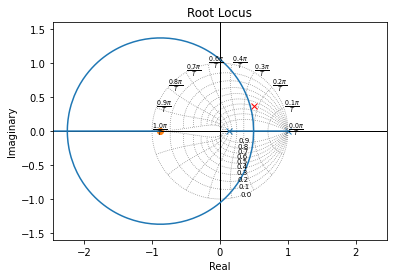

In [56]:
#Para calcular o lugar das raizes (rlocus) passamos na entrada a FTMA e o ganho Kc
control.matlab.rlocus(FTMA, [Kc])
plt.plot(z_rect.real, z_rect.imag, 'xr')
plt.xlim(-1,1)
plt.ylim(-1.6,1.6)
plt.show()
